# Preliminaries

In [10]:
import copy
import itertools
from collections import defaultdict
from operator import itemgetter
import folium
import numpy as np
from folium import plugins
from folium.plugins import HeatMap
import branca.colormap
from collections import defaultdict
import folium
import pandas as pd
from html2image import Html2Image
import os
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./moyen_data.csv', sep="\t")

/Users/clothildedevillenfagne/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (9,10,14,16,17,37,38,39,40,41,43,44,45,46,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
new_df = df[df['class']=='Aves']
new_df = new_df[['species', 'year', 'month', 'decimalLatitude', 'decimalLongitude', 'individualCount']]

# Analyse de la biodiversité

In [5]:
def ps_for_coo(df):
    latitude = df['decimalLatitude'].tolist()
    longitude = df['decimalLongitude'].tolist()
    coordonee = list(set(tuple(zip(latitude, longitude))))
    df_final = pd.DataFrame(index=coordonee)
    year = set(df['year'].tolist())
    for ye in year:
        print('Année : ', ye)
        #ye_list = []
        data1 = df[df['year']==ye]
        latitude = data1['decimalLatitude'].tolist()
        longitude = data1['decimalLongitude'].tolist()
        coordonee = list(set(tuple(zip(latitude, longitude))))
        big_list = []
        dim = len(data1)
        espece = set(data1['species'].tolist())
        for esp in espece:
            if pd.isnull(esp)==False:
                lst = [0] * len(coordonee)
                data2 = data1[data1['species'] == esp].copy()
                latitude_esp = data2['decimalLatitude'].tolist()
                longitude_esp = data2['decimalLongitude'].tolist()
                coordonee_esp = set(tuple(zip(latitude_esp, longitude_esp)))
                for coo in coordonee_esp:
                    index = coordonee.index(coo)
                    lst[index] = 1
                big_list.append(lst)

        df_prefix_coo = pd.DataFrame(big_list, columns =coordonee)
        dico_coo = df_prefix_coo.sum()
        df_coo = pd.DataFrame(dico_coo, columns=[ye])
    
        df_final = pd.concat([df_final, df_coo], axis=1)
        
    
    return df_final 

In [ ]:
res = ps_for_coo(new_df)

Année :  2000
Année :  2001
Année :  2002
Année :  2003
Année :  2004
Année :  2005
Année :  2006
Année :  2007
Année :  2008
Année :  2009
Année :  2010
Année :  2011
Année :  2012
Année :  2013
Année :  2014
Année :  2015
Année :  2016
Année :  2017
Année :  2018
Année :  2019
Année :  2020
Année :  2021


In [ ]:
#normalisation des donnée
df_max_scaled = res.copy() 
  
for column in df_max_scaled.columns: 
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max() 
      
display(df_max_scaled)

# Analyse de la quantité d'espèce

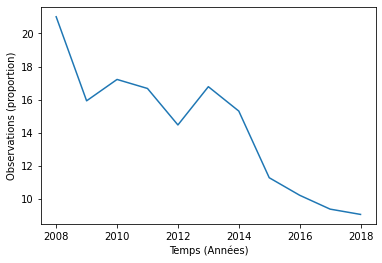

In [17]:
year = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
sum_ind = []
for ye in year:
    sum_ind.append(new_df[new_df['year']==ye]['individualCount'].sum()/len(new_df[new_df['year']==ye]))

plt.plot(year, sum_ind)
plt.xlabel('Temps (Années)')
plt.ylabel('Observations (proportion)')
plt.savefig('obs_ind.png')

In [ ]:
def ps_for_num(df):
    latitude = df['decimalLatitude'].tolist()
    longitude = df['decimalLongitude'].tolist()
    coordonee = list(set(tuple(zip(latitude, longitude))))
    df_final = pd.DataFrame(index=coordonee)
    year = set(df['year'].tolist())
    for ye in year:
        print('Année : ', ye)
        data1 = df[df['year']==ye]
        latitude = data1['decimalLatitude'].tolist()
        longitude = data1['decimalLongitude'].tolist()
        coordonee = list(set(tuple(zip(latitude, longitude))))
        big_list = []
        dim = len(data1)
        espece = set(data1['species'].tolist())
        for esp in espece:
            if pd.isnull(esp)==False:
                lst = [0] * len(coordonee)
                data2 = data1[data1['species'] == esp].copy()
                latitude_esp = data2['decimalLatitude'].tolist()
                longitude_esp = data2['decimalLongitude'].tolist()
                coordonee_esp = set(tuple(zip(latitude_esp, longitude_esp)))
                ind_count = final_df['individualCount'].tolist()
                for i in range(len(coordonee_esp)):
                    index = coordonee.index(coordonee_esp[i])
                    lst[index] += ind_count[i]
                big_list.append(lst)

        df_prefix_coo = pd.DataFrame(big_list, columns =coordonee)
        dico_coo = df_prefix_coo.sum()
        df_coo = pd.DataFrame(dico_coo, columns=[ye])
        df_final = pd.concat([df_final, df_coo], axis=1)
    
    return df_final       

# Plot carte

In [63]:
def map_coo (df, annee):
    count = df[annee].tolist()
    coo = df.index.tolist()
    #coo = test_df['coordonee'].tolist()
    #compte = test_df['compte'].tolist()
    
    loc = [4.35, 50.8333]
    mappy = folium.Map(location=[loc[1], loc[0]], zoom_start=8)
    heat = []
    for i in range(len(coo)):
        if pd.isnull(count[i])==False:
            value = int(count[i]*2)
            for j in range(value):
                heat.append(list(coo[i]))
    steps=20
    colormap = branca.colormap.linear.YlOrRd_09.scale(0, 1).to_step(steps)
    gradient_map=defaultdict(dict)
    for i in range(steps):
        gradient_map[1/steps*i] = colormap.rgb_hex_str(1/steps*i)
    colormap.add_to(mappy)
    HeatMap(heat,gradient = gradient_map).add_to(mappy)

    return mappy

In [ ]:
map(new_df,2018)